In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!tar -xvf 'drive/MyDrive/BMI707/OCT2017.tar.gz' -C './'

流式输出内容被截断，只能显示最后 5000 行内容。
./OCT2017/train/CNV/CNV-5674369-84.jpeg
./OCT2017/train/CNV/CNV-6666538-574.jpeg
./OCT2017/train/CNV/CNV-1188386-603.jpeg
./OCT2017/train/CNV/CNV-1781140-74.jpeg
./OCT2017/train/CNV/CNV-7315522-30.jpeg
./OCT2017/train/CNV/CNV-8082730-14.jpeg
./OCT2017/train/CNV/CNV-1781140-180.jpeg
./OCT2017/train/CNV/CNV-7907754-413.jpeg
./OCT2017/train/CNV/CNV-137351-113.jpeg
./OCT2017/train/CNV/CNV-4244160-134.jpeg
./OCT2017/train/CNV/CNV-9642260-283.jpeg
./OCT2017/train/CNV/CNV-732516-169.jpeg
./OCT2017/train/CNV/CNV-2192440-174.jpeg
./OCT2017/train/CNV/CNV-9206459-7.jpeg
./OCT2017/train/CNV/CNV-9598696-112.jpeg
./OCT2017/train/CNV/CNV-1651625-37.jpeg
./OCT2017/train/CNV/CNV-172472-51.jpeg
./OCT2017/train/CNV/CNV-1894770-40.jpeg
./OCT2017/train/CNV/CNV-4612183-53.jpeg
./OCT2017/train/CNV/CNV-9642260-241.jpeg
./OCT2017/train/CNV/CNV-8184974-60.jpeg
./OCT2017/train/CNV/CNV-2158821-4.jpeg
./OCT2017/train/CNV/CNV-9997680-79.jpeg
./OCT2017/train/CNV/CNV-4951152-24.jpeg
./OCT20

In [10]:
import imageio as iio
import os
import numpy as np
import seaborn as sns
import cv2
import skimage
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
training_size = 4000
num_class = 4

imageSize=224
train_dir = "./OCT2017/train/"
test_dir =  "./OCT2017/test/"

def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['NORMAL']:
                label = 0
            elif folderName in ['CNV']:
                label = 1
            elif folderName in ['DME']:
                label = 2
            elif folderName in ['DRUSEN']:
                label = 3
            else:
                label = 4
            for image_filename in tqdm(os.listdir(folder + folderName)[:int(training_size/num_class)]):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

X_train, y_train = get_data(train_dir)
X_test, y_test= get_data(test_dir)

100%|██████████| 250/250 [00:06<00:00, 36.53it/s]


In [3]:
def create_CNN(imageSize):
    inputs = tf.keras.Input(shape=(imageSize, imageSize, 3))
    x = tf.keras.layers.Conv2D(128, (3, 3),strides=2, activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(64, (6, 6), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(64, (6, 6), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    outputs = tf.keras.layers.Dense(num_class, activation='softmax')(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
    return model

In [4]:
model = create_CNN(224)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 111, 111, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 55, 55, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 53, 53, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 26, 26, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        294976

In [5]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
125/125 [==============================] - 10s 51ms/step - loss: 1.3615 - accuracy: 0.3072 - val_loss: 1.2600 - val_accuracy: 0.4900
Epoch 2/20
125/125 [==============================] - 5s 39ms/step - loss: 1.1767 - accuracy: 0.4775 - val_loss: 0.9868 - val_accuracy: 0.5460
Epoch 3/20
125/125 [==============================] - 5s 39ms/step - loss: 0.9773 - accuracy: 0.5922 - val_loss: 0.7109 - val_accuracy: 0.7540
Epoch 4/20
125/125 [==============================] - 5s 39ms/step - loss: 0.8658 - accuracy: 0.6423 - val_loss: 0.6972 - val_accuracy: 0.7390
Epoch 5/20
125/125 [==============================] - 5s 39ms/step - loss: 0.7912 - accuracy: 0.6768 - val_loss: 0.5685 - val_accuracy: 0.7740
Epoch 6/20
125/125 [==============================] - 5s 39ms/step - loss: 0.7390 - accuracy: 0.7090 - val_loss: 0.5144 - val_accuracy: 0.8080
Epoch 7/20
125/125 [==============================] - 5s 39ms/step - loss: 0.7011 - accuracy: 0.7225 - val_loss: 0.4952 - val_accuracy: 0.810

In [6]:
y_pred = model.predict(X_test)

32/32 [==============================] - 1s 15ms/step


In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
def plot_learning_curve(train_scores,val_scores, title=None, ylim=None):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training Epochs")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.plot(range(len(train_scores)), train_scores, '-', color="r",
             label="Training accuracy")
    plt.plot(range(len(val_scores)), val_scores, '-', color="g",
             label="Validation accuracy")

    plt.legend(loc="best")
    plt.show()

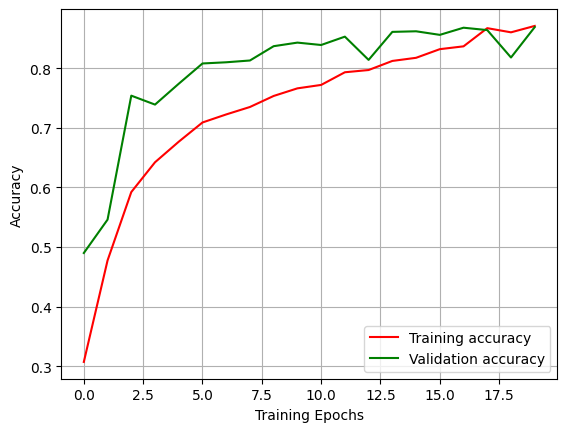

In [32]:
plot_learning_curve(history.history['accuracy'], history.history['val_accuracy'])

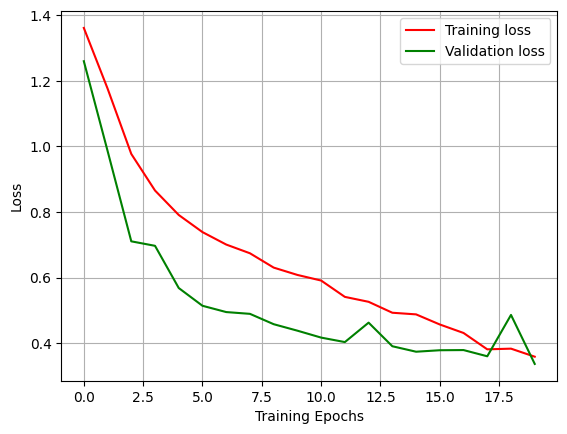

In [28]:
plot_learning_curve(history.history['loss'], history.history['val_loss'])

Text(0, 0.5, 'Loss')

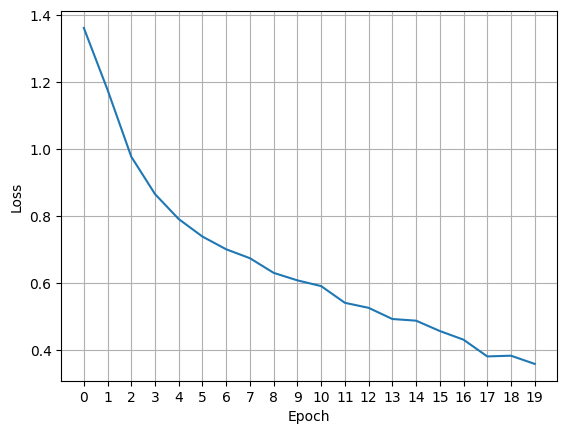

In [17]:
loss=history.history['loss']
plt.plot(epoch,loss)
plt.grid(True)
plt.xticks(range(min(epoch), max(epoch)+1))
plt.xlabel('Epoch')
plt.ylabel('Loss')

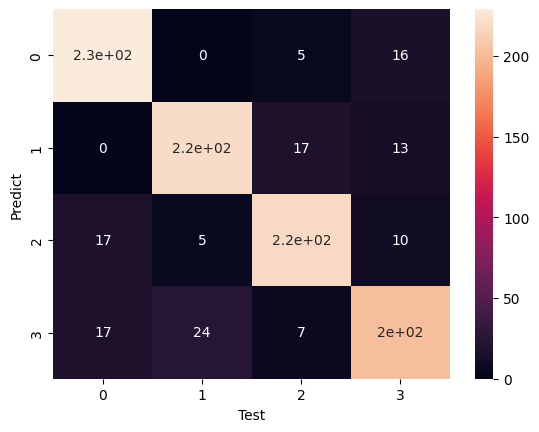

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       250
           1       0.88      0.88      0.88       250
           2       0.88      0.87      0.88       250
           3       0.84      0.81      0.82       250

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000



In [20]:
sns.heatmap(confusion_matrix(y_test, np.argmax(y_pred, axis=1)), annot=True)
plt.xlabel('Test')
plt.ylabel('Predict')
plt.show()
print(classification_report(y_test, np.argmax(y_pred, axis=1)))

In [19]:
confusion_matrix(y_test, np.argmax(y_pred, axis=1))

array([[229,   0,   5,  16],
       [  0, 220,  17,  13],
       [ 17,   5, 218,  10],
       [ 17,  24,   7, 202]])